In [18]:
%run nbinit.ipy

... Configuring matplotlib formats
... Configuring matplotlib with inline figures
... Importing numpy as np, scipy as sp, pyplot as plt, scipy.stats as stats
   ... scipy.signal as sig
... Importing widgets, display, HTML, Image, Javascript
... Some LaTeX definitions


... Defining figures captions 


... Loading customized Javascript for interactive solutions (show/hide)
... Redefining interactive from ipywidgets
... Redefining capture for ipywidgets < 7


# Table of Contents
* &nbsp;
	* [(Sub)-Sampling of time signals](#%28Sub%29-Sampling-of-time-signals)
	* [The sampling theorem](#The-sampling-theorem)
		* [Derivation in the case of discrete-time signals](#Derivation-in-the-case-of-discrete-time-signals)
		* [Case of continuous-time signals.](#Case-of-continuous-time-signals.)
		* [Illustrations](#Illustrations)


## (Sub)-Sampling of time signals

Let us now turn to the analysis of sampling in the time domain. This topic is important because it has applications for the acquisition and digitization of analog world signals. Subsampling, or downsampling, has also applications in multirate filtering, which frequently occurs in coding problems. We begin with the subsampling of discrete time  signals. With the Poisson formulas and the Plancherel theorem, the description of the process is quite easy. Subsampling simply consists in keeping one sample every say $N_0$ samples. This can be viewed succession of two operations
1. the product of our original signal with a Dirac comb of period $N_0$,
2. the discarding of the unwanted samples.
Of course, we could limit ourselves to the second step, which is the only useful one for downsampling. However, the succession of the two steps is important to understand what happens in the Fourier domain. 

Suppose that we have, at the beginning of step 2,  a signal with useful samples separated by $N_0-1$ zeros. This signal is denoted $x_s(n)$ and its Fourier transform is $X_s(f)$, with `s` for 'sampled':
$$
X_s(f)=\sum_n x_s(n) e^{-j2\pi fn}. 
$$
Taking into account that only the samples at indexes $n=kN_0$ are nonzeros, we may denote $x_d(k)=x_s(kN_0)$ (`d` for 'downsampled'), and make the change of variable $n=kN_0$
$$
X_s(f)=\sum_k x_d(k) e^{-j2\pi fkN_0}. 
$$
Hence, we see that $X_s(f)=X_d(fN_0)$, that is also
$$
X_d(f)=X_s\left(\frac{f}{N_0}\right).
$$
The Fourier transform of the downsampled signal is simply a scaled version of the Fourier transform of the sampled signal. Hence, they contain the very same information. In order to understand what happens in the sampling/downsampling operation, we thus have to focus on the sampling operation, that is step 1. above. The sampled signal is
$$
x_s(n) = x(n).\sha_{N_0}(n). 
$$
By Plancherel's theorem, we have
\begin{align}
X_s(f) & = \left[X*\tf{\sha_{N_0}(n)}\right](f)\\
& =\left[X*\frac{1}{N_0}{\sha_\frac{1}{N_0}}\right](f)\\
& = \frac{1}{N_0} \sum_k \left[X*\delta_\frac{k}{N_0}\right](f)
\end{align}
As in the discrete case, the continuous convolution with a Dirac comb results in the periodization of the initial pattern, that is
$$
\eqboxc{
\displaystyle{
X_s(f) = \frac{1}{N_0} \sum_k X(f-\frac{k}{N_0}).
}} \label{eq:freq_perio}
$$
This is a fundamental result:
\begin{textboxa}
\textem{Sampling in the time domain yields periodization in the frequency domain.}
\end{textboxa}

## Illustration 1
Let us illustrate this on our test signal:

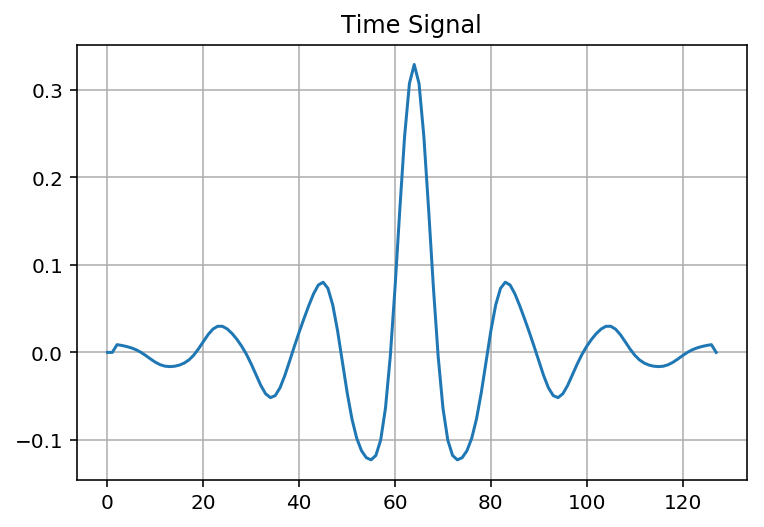

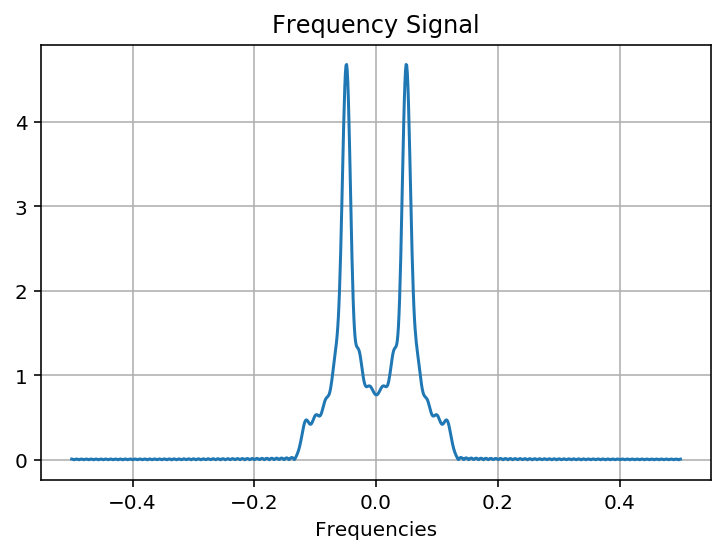

In [19]:
%matplotlib inline
loadsig = np.load("signal.npz")  #load the signal
x = loadsig["x"]
N = len(x)
#
M = 8 * N  #Used for fft computations
# Definition of vectors t and f
t = np.arange(N)
f = np.linspace(-0.5, 0.5, M)
# Plot time signal
plot(t, x)
title('Time Signal')
plt.grid(True)
plt.figure()
#plot frequency signal
xf = fftshift(fft(x, M))
plot(f, abs(xf))
title('Frequency Signal')
xlabel('Frequencies')
plt.grid(True)

We first define a subsampler function, that takes for argument the signal $x$ and the subsampling factor $k$. 

In [20]:
def subsampb(x, k, M=len(x)):
    """ Subsampling with a factor k
    Returns the subsampled signal and its Fourier transform"""
    xs = np.zeros(np.shape(x))
    xs[::k] = x[::k]
    xsf = fftshift(fft(xs, M))
    return (xs, xsf)

## Illustration 2

In [22]:
%matplotlib inline

out = widgets.Output()

slide_k=widgets.IntSlider(min=1,max=8,value=3, description="Subsampling factor")

@out.capture(clear_output=True, wait=True)
def sampling_experiment(val):
    k = slide_k.value
    fig,bx=plt.subplots(2,1,figsize=(8,6))
    # clear_output(wait=True)
    bx[0].plot(t,x, label='Original Signal')
    (xs,xsf)=subsampb(x,k,M)
    bx[0].stem(t,xs,linefmt='g-',markerfmt='bo', basefmt='b-',label='Subsampled Signal')
    bx[0].set_xlabel('Time')
    bx[0].legend()
    #
    bx[1].plot(f,abs(xf), label='Original Signal')
    #xef=subsampb(x,k)[1]
    bx[1].plot(f,k*abs(xsf),label='Fourier transform of subsampled signal')
    # The factor k above takes into account the power lost by subsampling
    xlabel('Frequency')
    bx[1].legend(loc=(0.6,0.85))
    fig.suptitle("Effect of sampling on time and frequency domains",fontsize=14)
    #tight_layout()
    plt.show()

display(widgets.VBox([slide_k, out]))
sampling_experiment('')
slide_k.observe(sampling_experiment,'value')

matplotlib external figure version:

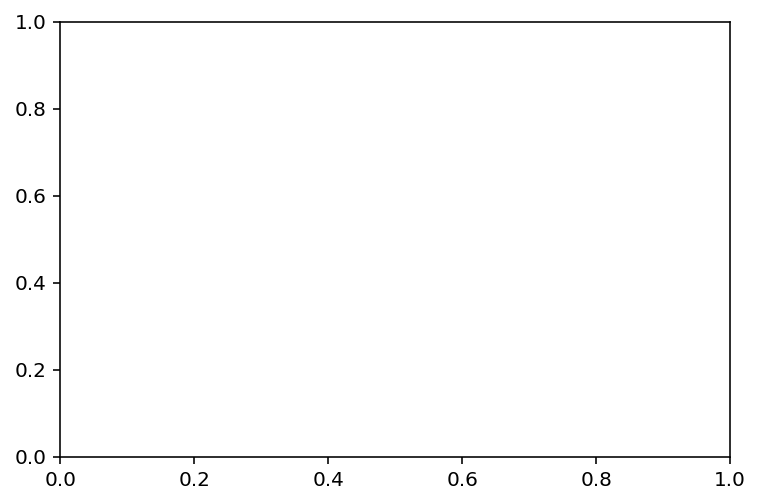

In [25]:
def plt_stem(t, x, *args, ax=gca(), **kwargs):
    xx = zeros(3 * len(x))
    xx[1:-1:3] = x
    xx = xx[:3 * len(x)]
    tt = np.repeat(t, 3)
    out = ax.plot(tt, xx, *args, **kwargs)
    return out

In [35]:
%matplotlib tk
from matplotlib.widgets import Slider

fig, ax = plt.subplots(2, 1)
fig.subplots_adjust(bottom=0.2, left=0.1)

slider_ax = fig.add_axes([0.1, 0.1, 0.8, 0.02])
slider = Slider(
    slider_ax,
    "Subsampling factor",
    1,
    10,
    valinit=3,
    color='#AAAAAA',
    valfmt='%0.0f')
L = 10
k = 5
(xs, xsf) = subsampb(x, k, M)

linexf, = ax[1].plot(f, abs(xf), lw=2)
linexf_update, = ax[1].plot(
    f, k * abs(xsf), label='Fourier transform of subsampled signal')

#markersx_update,stemsx_update,_=ax[0].stem(t,xs,linefmt='g-',markerfmt='bo', basefmt='b-',label='Subsampled Signal')
linex_update, = plt_stem(
    t, x, '-or', ax=ax[0])  #ax[0].plot(t,xs, 'ob', label='Subsampled Signal')
linex, = ax[0].plot(t, x, label='Original Signal')
ax[0].set_xlabel('Time')
ax[0].legend()

#line2, = ax.plot(f,sinc(pi*L*f), lw=2)
#line2 is in order to compare with the "true" sinc
ax[0].grid(b=True)
ax[1].grid(b=True)


def on_change(k):
    k = int(round(k))
    (xs, xsf) = subsampb(x, k, M)
    linexf_update.set_ydata(k * abs(xsf))
    xxs = zeros(3 * len(xs))
    xxs[1:-1:3] = xs
    linex_update.set_ydata(xxs)

slider.on_changed(on_change)

0

## The sampling theorem

### Derivation in the case of discrete-time signals

As a consequence, we will obtain a sufficient condition for the reconstruction of the original signal from its samples. Assume that \textbf{$x(n)$ is a real band-limited signal with a maximum frequency $B$}.
$$
X(f) = 0 \text{ for } |f|>B 
$$
with $f\in[-\frac{1}{2},\frac{1}{2}]$ for discrete time signals.
Then, after sampling at rate $f_s$, the Fourier transform is the periodic summation of the original spectrum.
\begin{equation}
\displaystyle{
X_s(f) = f_s \sum_k X(f-kf_s).
} 
\end{equation}

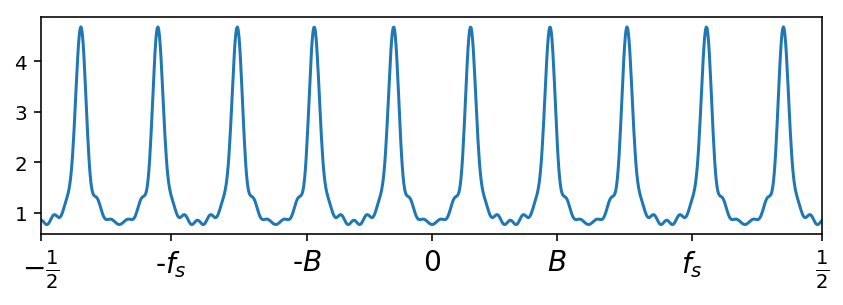

In [36]:
%matplotlib inline
plt.figure(figsize=(7,2))
plt.plot(f,k*abs(xsf),label='Fourier transform of subsampled signal')
plt.xlim([-0.5,0.5])
_=plt.xticks([-1/2, -1/3, -0.16, 0, 0.16, 1/3, 1/2],  
    ['$-\\frac{1}{2}$','-$f_s$','-$B$', '$0$', '$B$','$f_s$','$\\frac{1}{2}$'], 
             fontsize=14)

Hence, provided that there is no aliasing between consecutive images, it will be possible to retrieve the initial Fourier transform from this periodized signal. This is a fundamental result, which is known as the \textbf{Shannon-Nyquist theorem}, or **sampling theorem**. 

In the frequency domain, this simply amounts to introduce a filter $H(f)$ that only keeps the frequencies in $[-f_s/2,f_s/2]$:
$$
\begin{cases}
H(f) =1  & \text{  for } |f|< f_s/2  \\
H(f) = 0 & \text{  for } |f|> f_s/2  \\
\end{cases}
$$
in the interval $f\in[-\frac{1}{2},\frac{1}{2}]$ for discrete time signals. Clearly, we then have
$$
X_s(f).H(f) = f_s X(f)
$$
and we are able to recover $X(f)$ up to a simple factor. Of course, since we recover our signal in the frequency domain, we can also get it in the time domain by inverse Fourier transform. By Plancherel's theorem, it immediately comes
$$
x(n) = T_s [x_s*h](n),
$$
with $T_s=1/f_s$. A simple computation gives us the expression of the impulse response $h$ as the inverse Fourier transform of a rectangular pulse of width $f_s$:
\begin{align}
h(n) & =\int_{[1]} \text{rect}_{f_s}(f) e^{j2 \pi f n} \text{d}f \\ 
& = \int_{-\frac{f_s}{2}}^{\frac{f_s}{2}}  e^{j2 \pi f n} \text{d}f \\
& = f_s \frac{\sin(\pi f_s n)}{\pi f_s n}
\end{align}
In developed form, the convolution then expresses as
$$
\eqboxd{
\displaystyle{
x(n) =  \sum_{k=-\infty}^{+\infty} x(kT_s) \frac{\sin(\pi f_s (n-kT_s))} {\pi f_s (n-kT_s)}. 
}}
$$

This formula shows that **it is possible to perfectly reconstruct a bandlimited signal** from its samples, provided that the sampling rate $f_s$  is more than twice the maximum frequency $B$ of the signal. Half the sampling frequency, $f_s/2$ is called the Nyquist frequency, while the minimum sampling frequency is the Nyquist rate.  

The Shannon-Nyquist theorem can then be stated as follows:
<div class=mybox>
\begin{theorem} --Shannon-Nyquist theorem.  
For a real bandlimited signal with maximum frequency $B$, a correct sampling requires
$$
f_s > 2B.
$$
It is then possible to perfectly reconstruct the original signal from its samples, through the Shannon-Nyquist interpolation formula 
$$
x(n) =  \sum_{k=-\infty}^{+\infty} x(kT_s) \frac{\sin(\pi f_s (n-kT_s))} {\pi f_s (n-kT_s)}. 
$$
\end{theorem}
</div>

### Case of continuous-time signals.

The same reasonings can be done in the case of continuous-time signals.  Sampling a signal $x(t)$ consists in multiplying the initial signal with a (time-continuous) Dirac comb with period $T_s=1/f_s$. In the frequency domain, this yields the convolution of the initial spectrum with the Fourier transform of the Dirac comb, which is also, as in the discrete case, a Dirac comb. Then one obtains a periodic summation of the original spectrum: 
$$
\displaystyle{
X_s(f) = f_s \sum_k X(f-kf_s).
} 
$$
Aliasing is avoided if the sampling frequency $f_s$ is such that
$$
f_s > 2B.
$$
In such case, it is possible to perfectly recover the original signal from its samples, using the reconstruction formula
$$
x(t) =  \sum_{k=-\infty}^{+\infty} x(kT_s) \frac{\sin(\pi f_s (t-kT_s))} {\pi f_s (t-kT_s)}. 
$$

### Illustrations

\begin{exercise}
Here we want to check the Shannon interpolation formula for correctly sampled signals:
$$
x(n) =  \sum_{k=-\infty}^{+\infty} x(kT_s) \frac{\sin(\pi f_s (n-kT_s))} {\pi f_s (n-kT_s)}. 
$$
   In order to do that, you will first create a sinusoid with frequency $f_0$ (eg $f_0=0.05$). You will sample this sine wave at 4 samples per period ($f_s=4f_0$). Then, you will implement the interpolation formula and will compare the approximation (finite number of terms in the sum) to the intial signal. The `numpy` module provides a `sinc` function, but you should beware to the fact that the definition used includes the $\pi$: $\mathrm{sinc}(x)=\sin(\pi x)/(\pi x)$
\end{exercise}

>You have to study, complete the following script and implement the interpolation formula. 

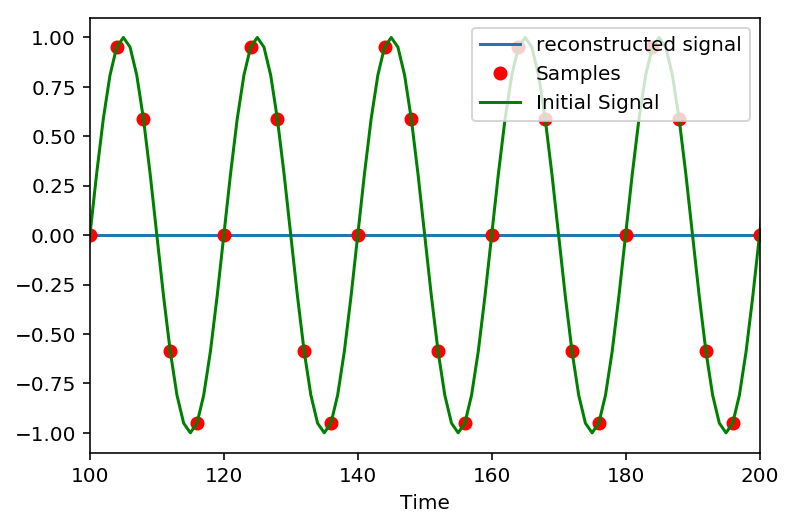

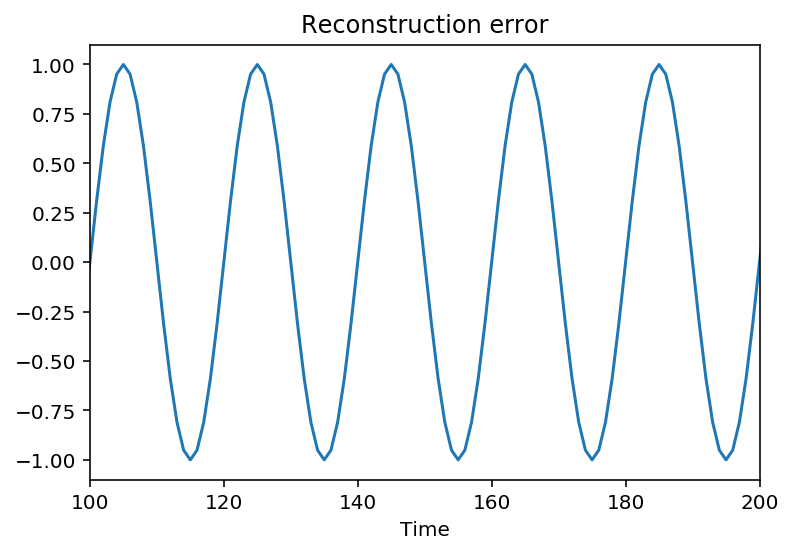

In [37]:
N = 4000
t = np.arange(N)
fo = 0.05  #--> 1/fo=20 samples per periode
x = sin(2 * pi * fo * t)
ts = np.arange(0, N, 4)  # 5 samples per periode
xs = x[::4]  #downsampling, 5 samples per periode
num = np.size(ts)  # number of samples

Ts, Fs = 4, 1 / 4
x_rec = zeros(N)  #reconstructed signal
#
# IMPLEMENT HERE THE RECONSTRUCTION FORMULA x_rec=...
#

#Plotting the rsults
plt.plot(t, x_rec, label="reconstructed signal")
plt.plot(ts, xs, 'ro', label="Samples")
plt.plot(t, x, '-g', label="Initial Signal")
plt.xlabel("Time")
plt.xlim([100, 200])
plt.legend()

plt.figure()
plt.plot(t, x - x_rec)
plt.title("Reconstruction error")
plt.xlabel("Time")
_ = plt.xlim([100, 200])

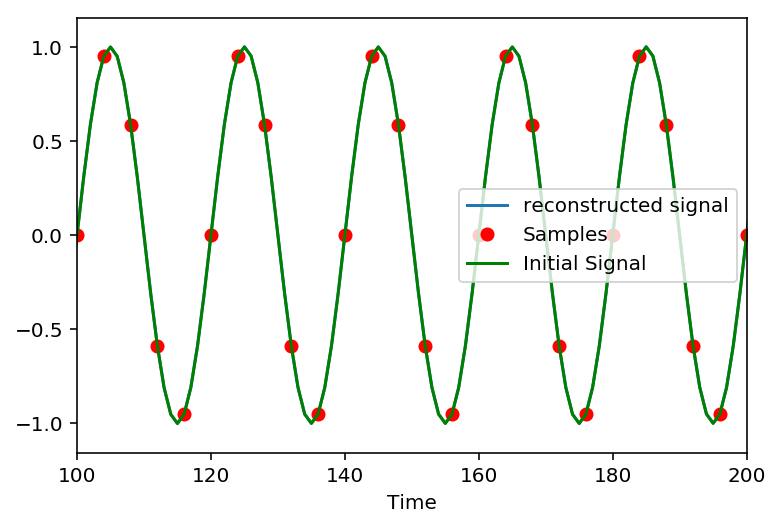

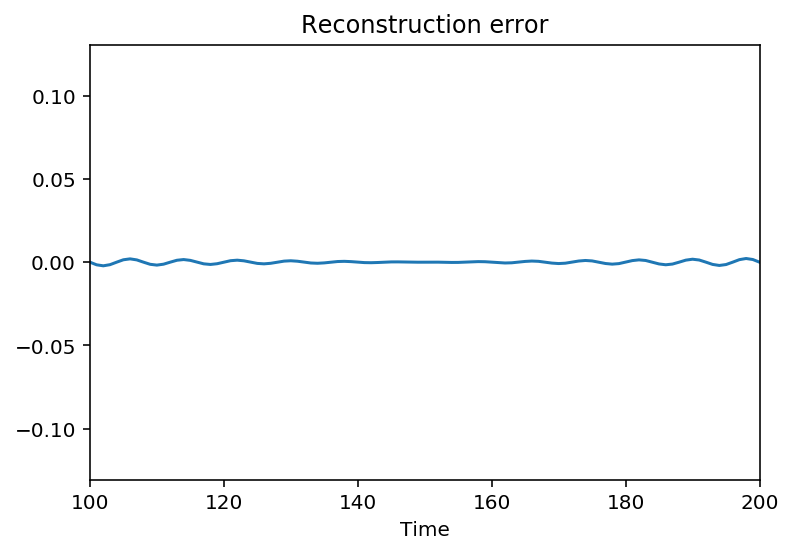

In [38]:
N = 300
t = np.arange(N)
fo = 0.05  #--> 1/fo=20 samples per period
x = sin(2 * pi * fo * t)
ts = np.arange(0, N, 4)  # 5 samples per period
num = np.size(ts)  # number of samples
xs = x[::4]  #downsampling, 5 samples per period

Ts, Fs = 4, 1 / 4
x_rec = zeros(N)  #reconstructed signal
for k in range(num):
    x_rec = x_rec + xs[k] * np.sinc(Fs*(t - k * Ts))  #! The sinc includes the pi

plt.plot(t, x_rec, label="reconstructed signal")
plt.plot(ts, xs, 'ro', label="Samples")
plt.plot(t, x, '-g', label="Initial Signal")
plt.xlabel("Time")
plt.xlim([100, 200])
plt.legend()

plt.figure()
plt.plot(t, x - x_rec)
plt.title("Reconstruction error")
plt.xlabel("Time")
_ = plt.xlim([100, 200])

We observe that there still exists a very small error, but an existing one, and if we look carefully at it, we may observe that the error is more important on the edges of the interval. 

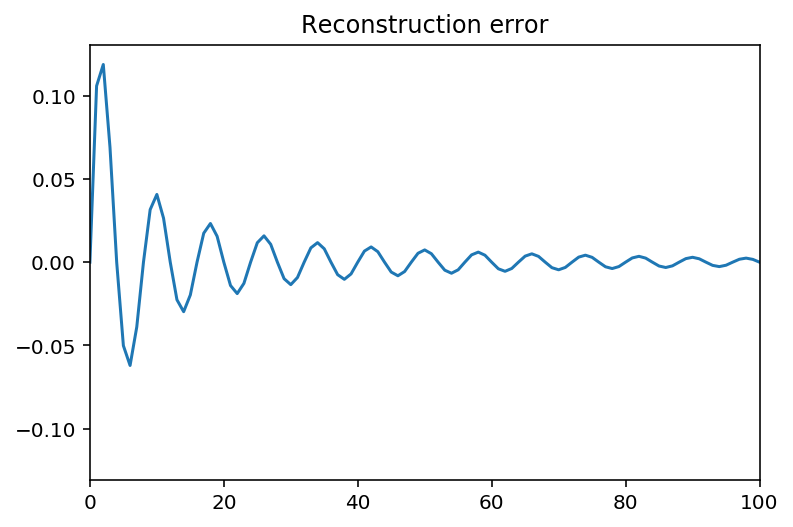

In [39]:
plt.figure()
plt.plot(t,x-x_rec)
plt.title("Reconstruction error")
_=plt.xlim([0,100]) 

Actually, there is a duality between the time and frequency domains which implies that 
\begin{textboxa}
signals with a finite support in one domain have an infinite support in the other. 
\end{textboxa}
Consequently, a signal cannot be limited simultaneously in both domains. In the case of our previous sine wave, when we compute the Discrete-time Fourier transform (\ref{def:DiscreteTimeFT}), we implicitly suppose that the signal is zero out of the observation interval. Therefore, its Fourier transform has infinite support and time sampling will result in (a small) aliasing in the frequency domain. 

It thus seems that it is not possible to downsample **time-limited** discrete signals without (a perhaps very small) loss. Actually, we will see that this is still possible, using subband coding. 

**Analysis of the aliasing due to time-limited support.**  

We first zero-pad the initial signal;
- this emphasizes that the signal is time-limited
- and enables to look at what happens at the edges of the support

In [40]:
bigN = 1000
x_extended = np.zeros(bigN)
x_extended[200:200 + N] = x
#
t = np.arange(0, bigN)  # 
ts = np.arange(0, bigN, 4)  # 
num = np.size(ts)  # number of samples
xs = x_extended[::4]  #downsampling, 5 samples per periode

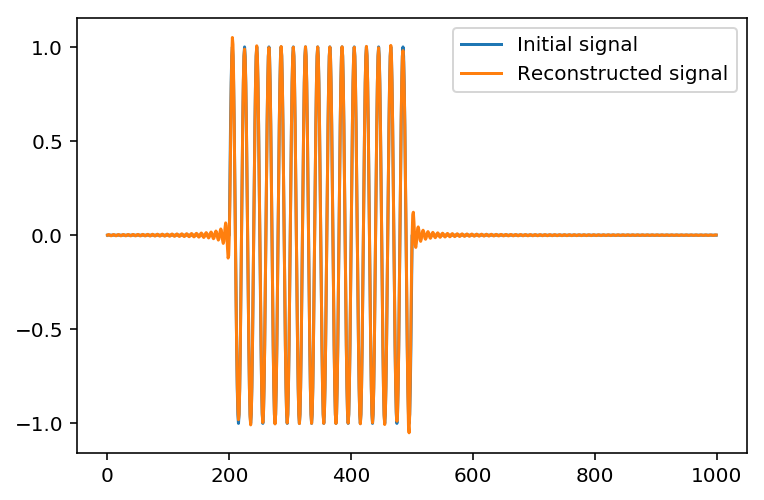

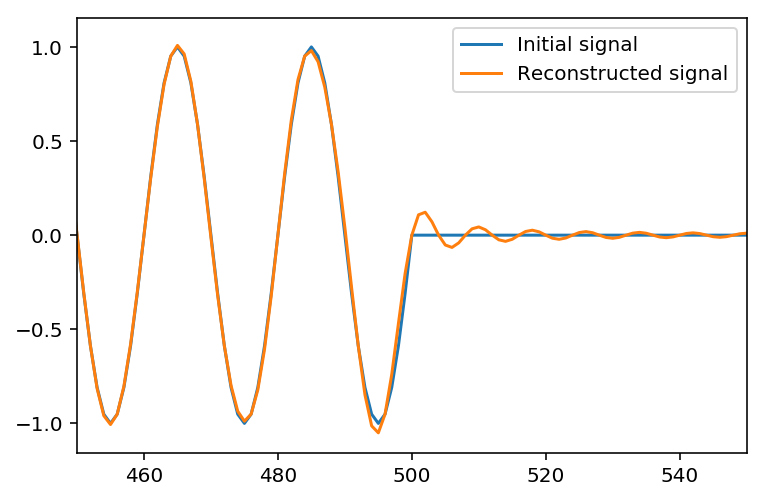

In [41]:
# Reconstruction
Ts, Fs = 4, 1 / 4
x_rec = zeros(bigN)  #reconstructed signal
for n in range(num):
    x_rec = x_rec + xs[n] * np.sinc(Fs*(t - n * Ts))  #! The sinc includes the pi

# Plotting the results    
plt.plot(x_extended, label="Initial signal")
plt.plot(t, x_rec, label="Reconstructed signal")
plt.legend()
plt.figure()
plt.plot(x_extended, label="Initial signal")
plt.plot(t, x_rec, label="Reconstructed signal")
plt.xlim([450, 550])
_ = plt.legend()

Analysis in the frequency domain

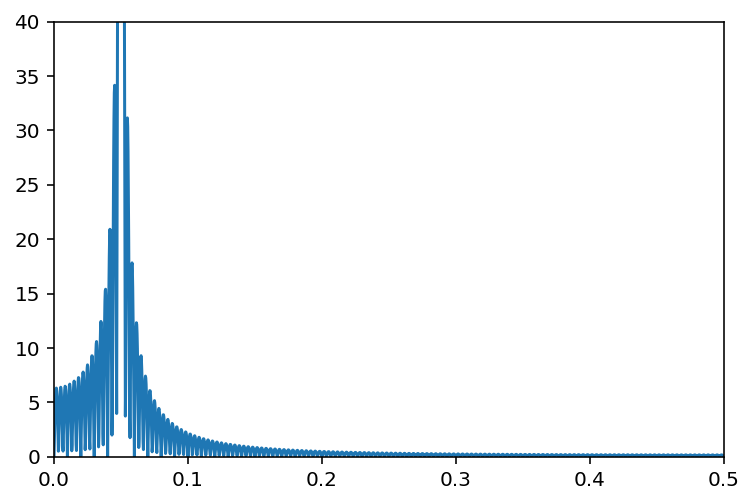

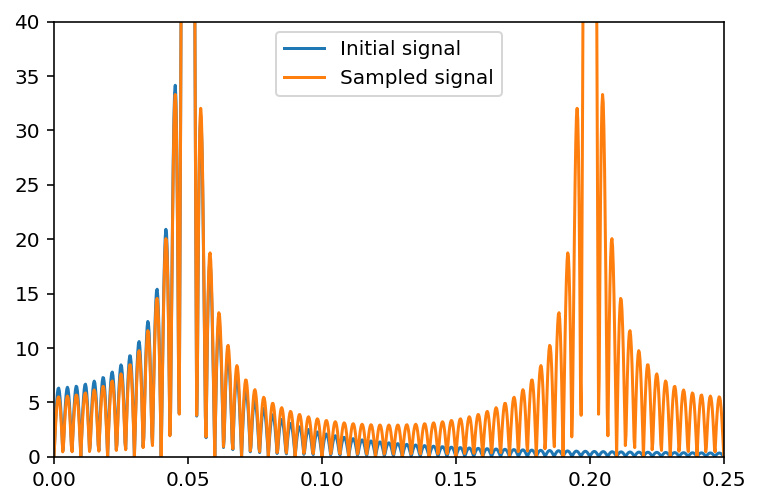

In [42]:
xxs = np.zeros(np.size(x_extended))
xxs[::4] = x_extended[::4]
xf = np.abs(fft(x_extended, 4000))
xxsf = 4 * np.abs(fft(xxs, 4000))
f = np.linspace(0, 1, 4000)
# Plotting
plt.plot(f, xf, label="Initial signal")
plt.ylim([0, 40])
_ = plt.xlim([0, 1 / 2])
#plt.plot(f,xxsf,label="Sampled signal")
# Details
plt.figure()
plt.plot(f, xf, label="Initial signal")
plt.plot(f, xxsf, label="Sampled signal")
plt.legend()
plt.ylim([0, 40])
_ = plt.xlim([0, 1 / 4])

We see that
- we have infinite support in the frequency domain, the graph of the initial signal shows that it is not band-limited.
- This implies **aliasing**: the graph of the Fourier transform of the sampled signal clearly shows that aliasing occurs, which modifies the values below $f_s/2=0.125$.

### Sampling of band-pass signals

to be continued...


----
<div align=right> [Index](toc.ipynb) - [Back](DFT.ipynb) - [Next](LabImages_text.ipynb)</div>